In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Carga y Exploración de Datos

Se carga el conjunto de datos `data_hause.csv` utilizando pandas. A continuación, se realiza una inspección inicial para visualizar las primeras filas, conocer la dimensión del dataset y los tipos de variables presentes.

In [2]:
data_hause = pd.read_csv('data_hause.csv')

In [3]:
data_hause.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


## Tipos de Variables y Dimensión del Dataset

Se revisa la cantidad de registros y columnas, así como los tipos de datos de cada variable, lo que es fundamental para el posterior preprocesamiento.

In [4]:
data_hause.shape

(4600, 18)

In [5]:
data_hause.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
# Tipos de variable
data_hause.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

## Modificación y Conversión de Variables

Se renombran columnas y se convierte la columna de fechas al formato adecuado para facilitar el análisis temporal y la manipulación de los datos.

In [7]:
data_hause_modificada = data_hause

In [8]:
data_hause_modificada = data_hause_modificada.rename(columns={'Fecha': 'date'})
data_hause_modificada['date'] = pd.to_datetime(data_hause_modificada['date'])
display(data_hause_modificada['date'].head(2))

0   2014-05-02
1   2014-05-02
Name: date, dtype: datetime64[ns]

In [9]:
Incluir_variables = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built']
data_hause_modificada[Incluir_variables].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1970.786304
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,29.731848
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1900.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1951.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1976.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,1997.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,2014.000000


## Estadística Descriptiva de Variables Seleccionadas

Se obtiene un resumen estadístico de las variables más relevantes para el análisis, lo que permite identificar rangos, medias y posibles valores atípicos.

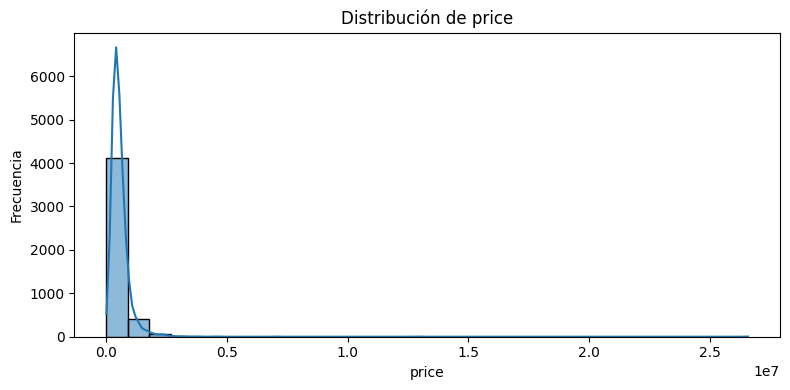

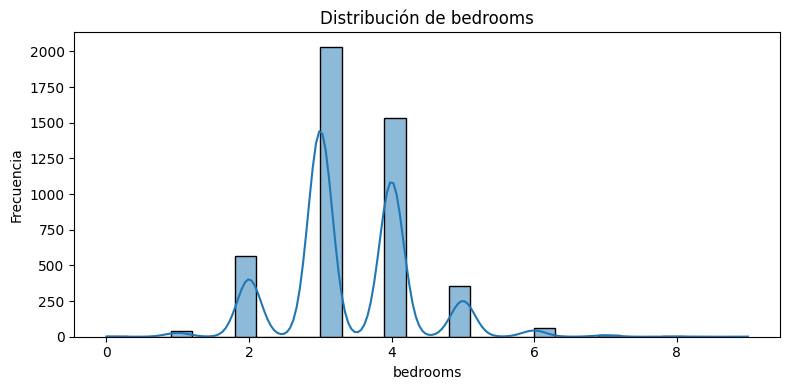

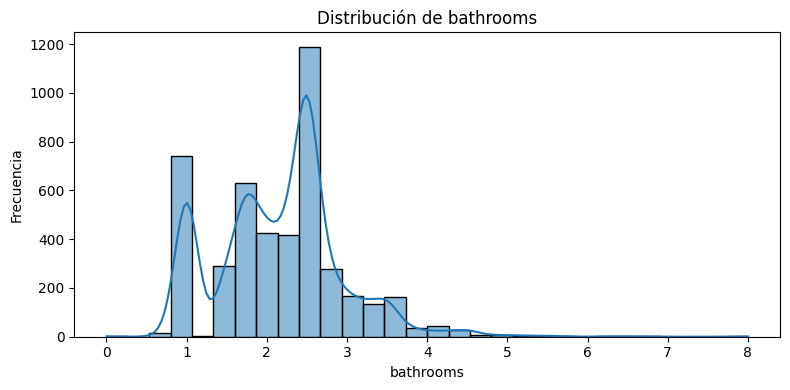

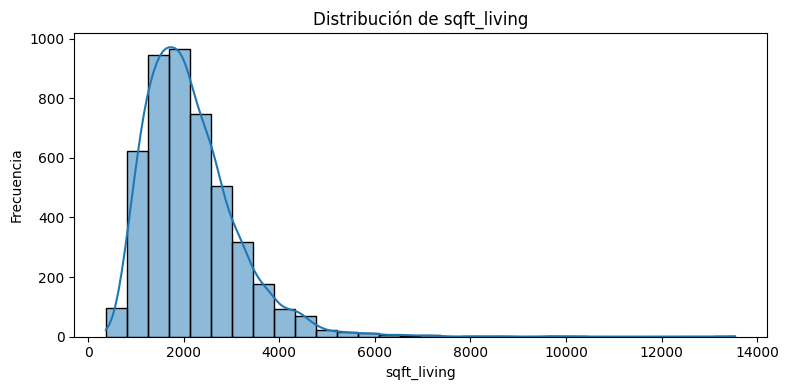

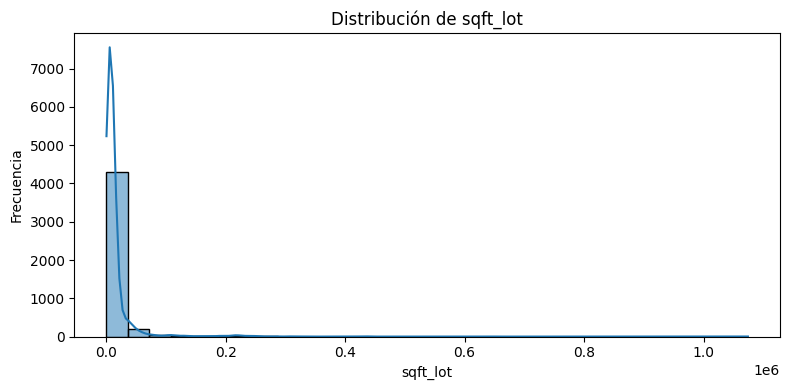

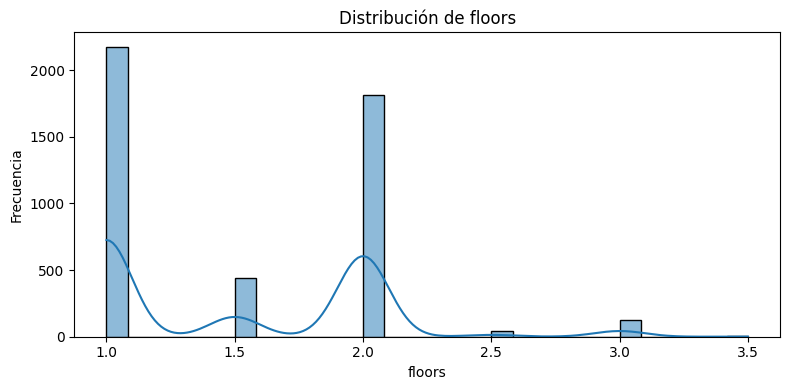

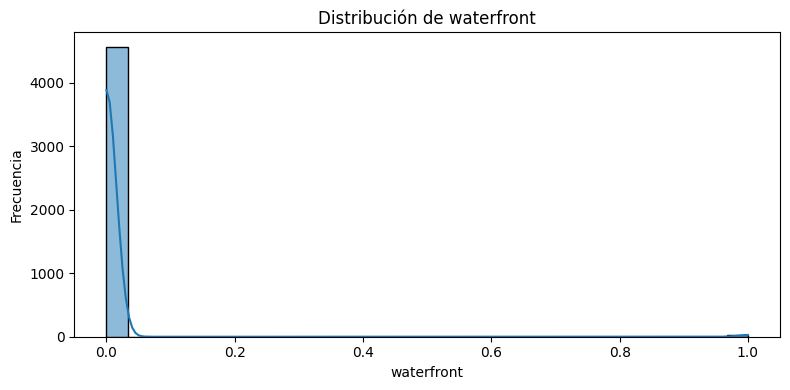

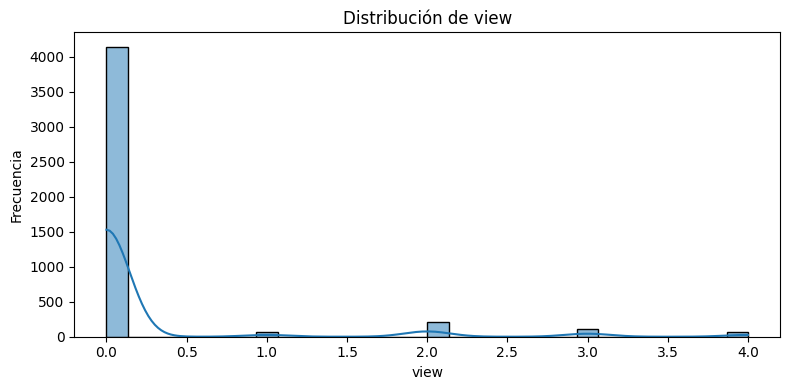

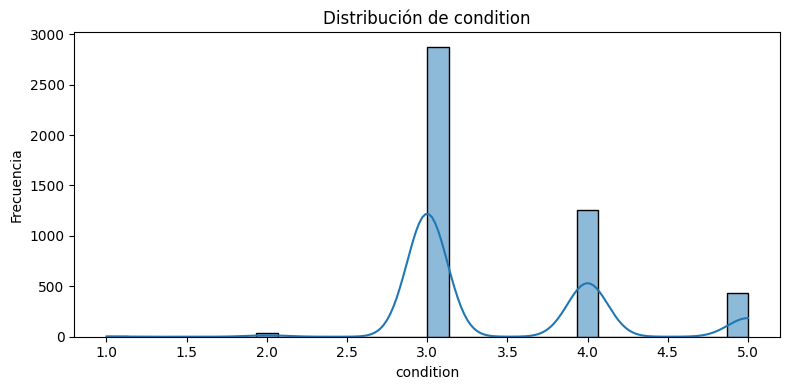

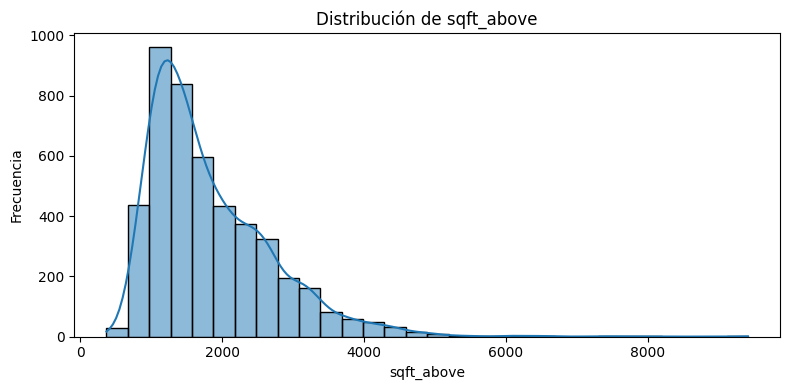

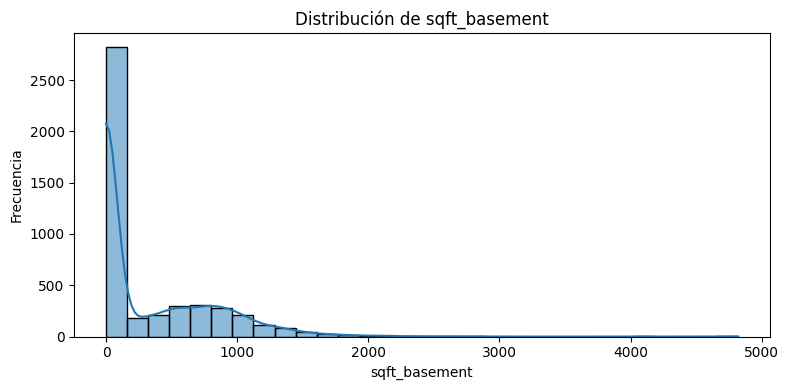

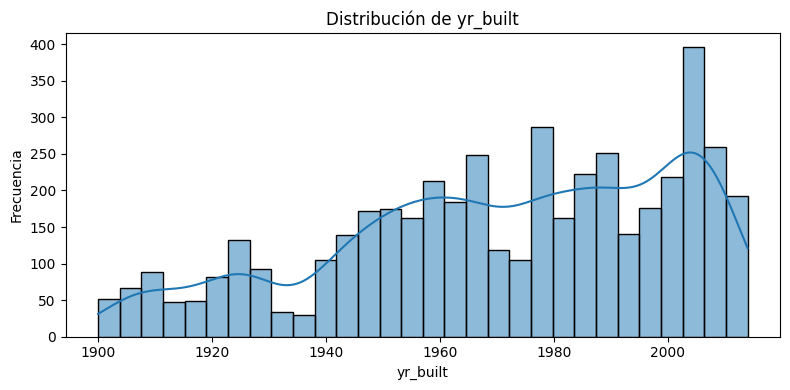

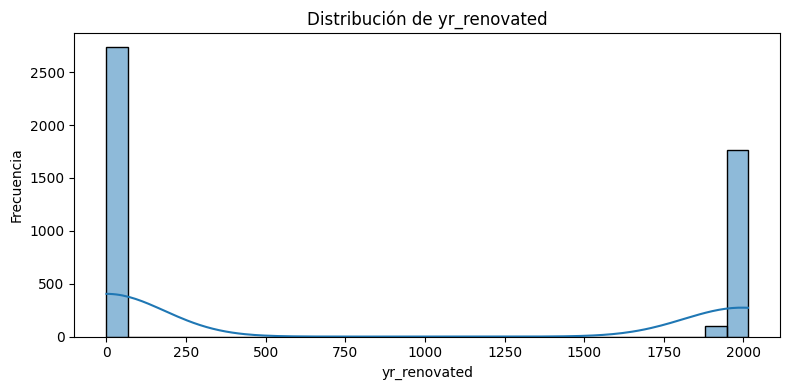

In [10]:
import warnings
import warnings
#warnings.filterwarnings('ignore') 

numericas = data_hause_modificada.select_dtypes(include=["number"]).columns

for col in numericas:
    plt.figure(figsize=(8, 4))
    sns.histplot(data_hause_modificada[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

## Análisis de Valores Nulos

Se identifican posibles valores nulos en el dataset, lo cual es esencial para evitar errores en el modelado y análisis posterior.

In [11]:
#Datos nulos
data_hause_modificada.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

## Identificación y Tratamiento de Outliers

Se detectan y eliminan valores atípicos utilizando el rango intercuartílico (IQR), mejorando así la calidad de los datos y la robustez de los modelos.

In [12]:
#identificando y tratando datos atipicos

Q1 = data_hause_modificada.quantile(0.25, numeric_only=True)
Q3 = data_hause_modificada.quantile(0.75, numeric_only=True)
IQR = Q3-Q1
data_hause_modificada = data_hause_modificada[~((data_hause_modificada.select_dtypes(include='number') < (Q1 - IQR*1.5))|(data_hause_modificada.select_dtypes(include='number')> (Q3+ IQR*1.5))).any(axis=1)]

## Visualización de Outliers en el Precio

Se utiliza un diagrama de caja (boxplot) para visualizar los valores atípicos en la variable objetivo `price` antes y después del tratamiento.

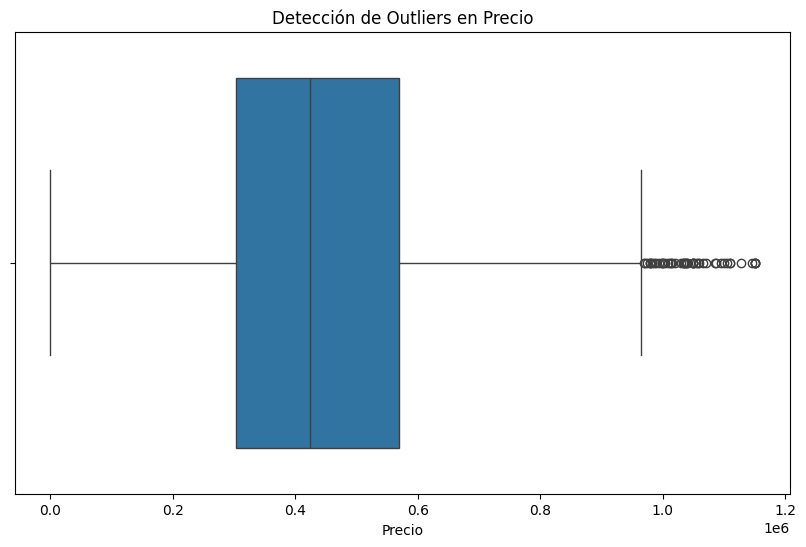

In [13]:
# Visualización de outliers en 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_hause_modificada['price'])
plt.title('Detección de Outliers en Precio')
plt.xlabel('Precio')
plt.show()

In [14]:
data_hause_modificada.shape

(3448, 18)

## Análisis de Correlación

Se presenta un mapa de calor que muestra la correlación entre las variables numéricas, facilitando la identificación de relaciones lineales importantes para el modelado.

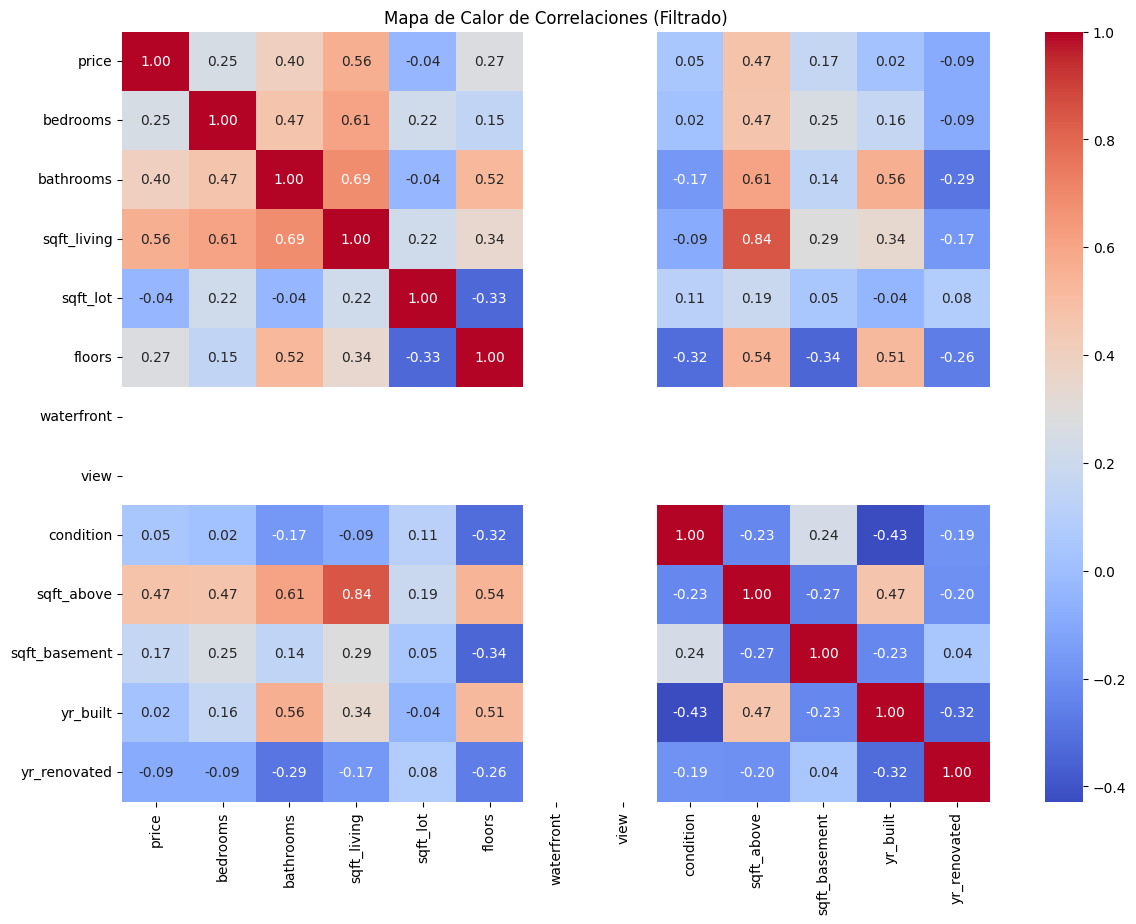

In [15]:
plt.figure(figsize=(14, 10))
sns.heatmap(data_hause_modificada.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones (Filtrado)')
plt.show()

## Relación entre Superficie Construida y Precio

Se grafica la relación entre los metros cuadrados construidos y el precio de las viviendas, permitiendo identificar tendencias y patrones relevantes.

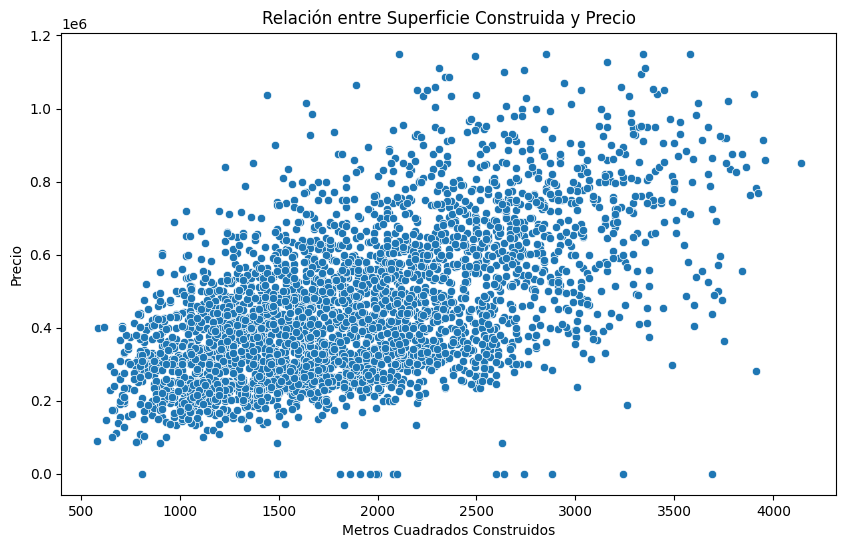

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_hause_modificada, x='sqft_living', y='price')
plt.title('Relación entre Superficie Construida y Precio')
plt.xlabel('Metros Cuadrados Construidos')
plt.ylabel('Precio')
plt.show()

## Precio Promedio según Número de Habitaciones

Se analiza cómo varía el precio promedio de las viviendas en función del número de habitaciones, utilizando un gráfico de barras.

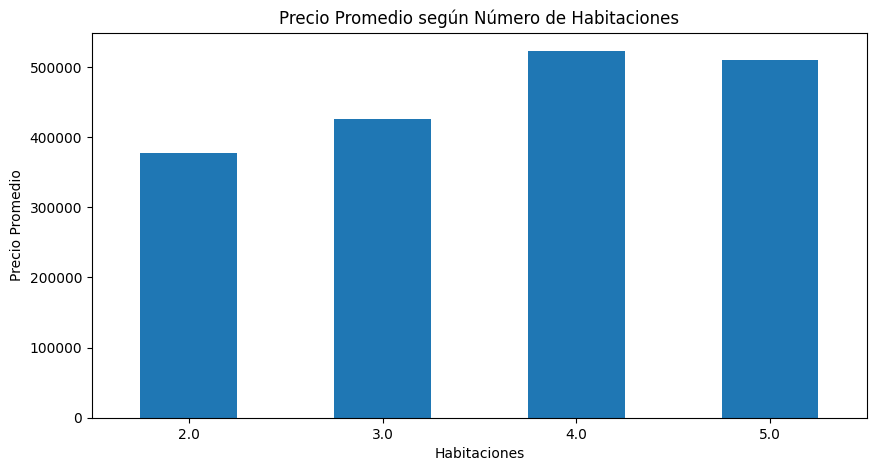

In [17]:
grouped_bedrooms = data_hause_modificada.groupby('bedrooms')['price'].mean()

plt.figure(figsize=(10, 5))
grouped_bedrooms.plot(kind='bar')
plt.title('Precio Promedio según Número de Habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=0)
plt.show()

## Relación entre Estado de la Vivienda y Precio

Se visualiza la relación entre la condición de la vivienda y su precio mediante un boxplot, lo que ayuda a entender el impacto de esta variable en el valor final.

C:\Users\FA-BI\AppData\Local\Temp\ipykernel_8864\1072742014.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='condition', y='price', data = data_hause_modificada, palette='coolwarm')


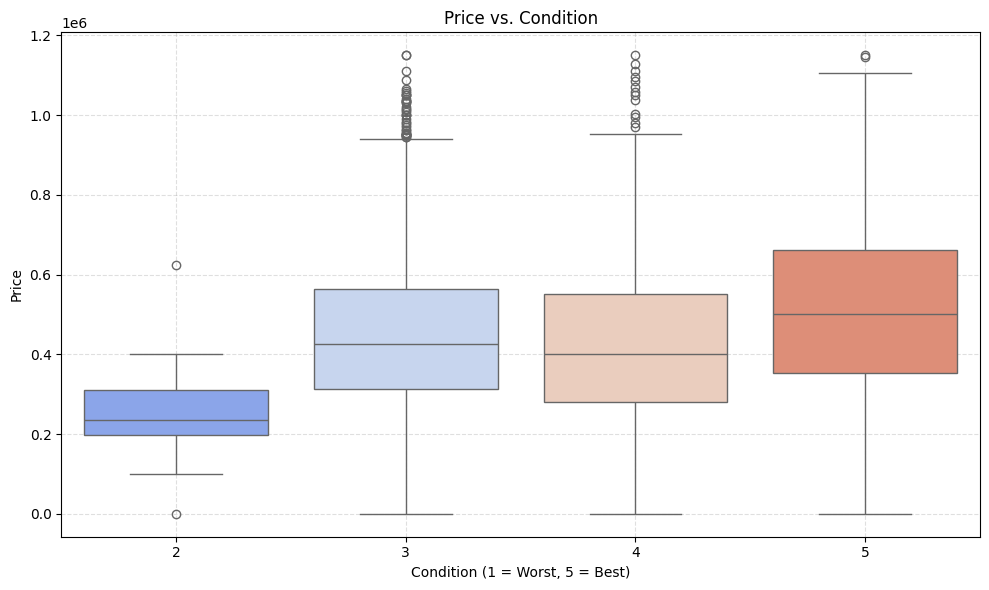

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data = data_hause_modificada, palette='coolwarm')
plt.title("Price vs. Condition")
plt.xlabel("Condition (1 = Worst, 5 = Best)")
plt.ylabel("Price")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

## Eliminación de Columnas Irrelevantes

Se eliminan columnas que no aportan valor predictivo al modelo, optimizando así el conjunto de datos para el entrenamiento.

In [19]:
data_hause_modificada.drop(['date','street','city','statezip','country'], axis=1, inplace=True)

## Separación de Variables Predictoras y Objetivo

Se separan las variables independientes (X) de la variable objetivo (y), y se divide el dataset en conjuntos de entrenamiento y prueba.

In [20]:
X = data_hause_modificada.drop(columns='price', axis =1)
y = data_hause_modificada['price']

In [21]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train , y_test = train_test_split(X,y,test_size=0.3, random_state=42)

## Entrenamiento del Modelo Random Forest

Se entrena un modelo de Random Forest para la predicción del precio de las viviendas, utilizando el conjunto de entrenamiento.

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
y_pred = regressor.predict(X_test)

## Predicción y Evaluación del Modelo Random Forest

Se realizan predicciones sobre el conjunto de prueba y se evalúa el desempeño del modelo utilizando métricas como R², MAE y RMSE.

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

r2_score_y_pred = r2_score(y_test,y_pred)
print(r2_score_y_pred)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

0.42484901108128525
Mean Absolute Error (MAE): 116554.03035806544
Root Mean Squared Error (RMSE): 151314.0952486998


## Visualización: Valores Reales vs Predichos (Random Forest)

Se grafica la relación entre los valores reales y los valores predichos por el modelo Random Forest, permitiendo evaluar visualmente la precisión del modelo.

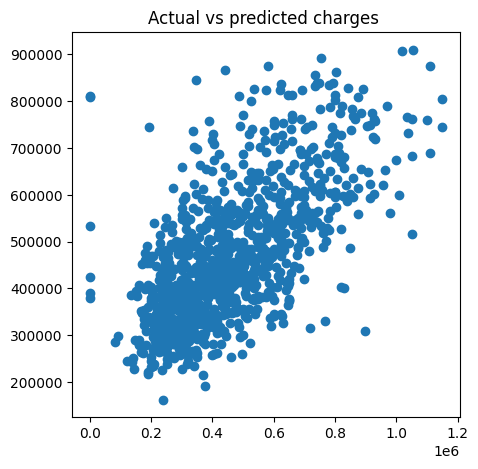

In [25]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)

plt.title('Actual vs predicted charges ')
plt.show()

In [26]:
data_hause_modificada.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994


**PREDICCIÓN CON DATOS EXISTENTES**

In [27]:
new_pred=(3.0,1.50,1340	,7912,1.5,0	,0,3,1340,0	,1955,2005)

In [28]:
new_pred_array = np.array(new_pred).reshape(1, -1)

In [29]:
prediction = regressor.predict(new_pred_array)
print(f'The new value of prediction:{prediction}')

The new value of prediction:[447255.23]


c:\Users\FA-BI\OneDrive\Documentos\Maestria IA\SEMESTRE 1\APRENDIZAJE ATOMATICO\Proyecto Final\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Predicción con Nuevos Datos (Random Forest)

Se realizan predicciones utilizando datos de ejemplo no vistos por el modelo, demostrando la aplicabilidad práctica del modelo entrenado.

In [30]:
new_pred=(2.0,1.0,880,6380,1,0,0,3,880,0,1938,1994)
new_pred_array = np.array(new_pred).reshape(1, -1)
prediction = regressor.predict(new_pred_array)
print(f'The new value of prediction:{prediction}')

The new value of prediction:[399996.59166667]


c:\Users\FA-BI\OneDrive\Documentos\Maestria IA\SEMESTRE 1\APRENDIZAJE ATOMATICO\Proyecto Final\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Visualización del Punto Predicho

Se visualiza el punto predicho para un nuevo dato sobre la gráfica de valores reales vs predichos, resaltando la predicción realizada.

## Visualización del Punto Predicho

Se visualiza el punto predicho para un nuevo dato sobre la gráfica de valores reales vs predichos, resaltando la predicción realizada.

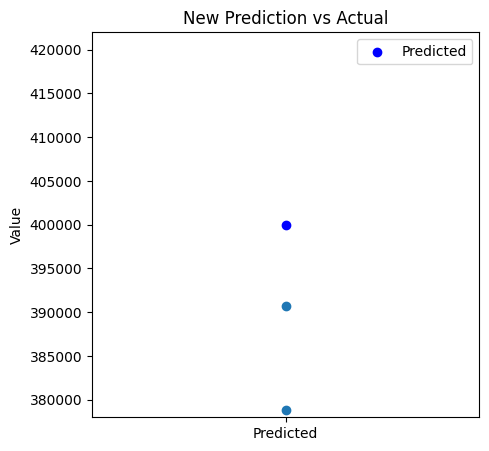

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)
plt.scatter(['Predicted'], [prediction[0]], color='blue', label='Predicted')
plt.title('New Prediction vs Actual')
plt.ylabel('Value')
plt.legend()
plt.show()

## Comparación Gráfica: Valor Real vs Predicho

Se compara gráficamente el valor real y el valor predicho para un caso específico, facilitando la interpretación del resultado.

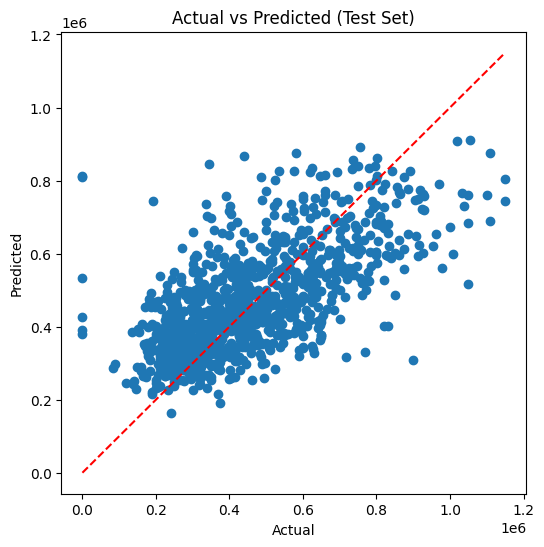

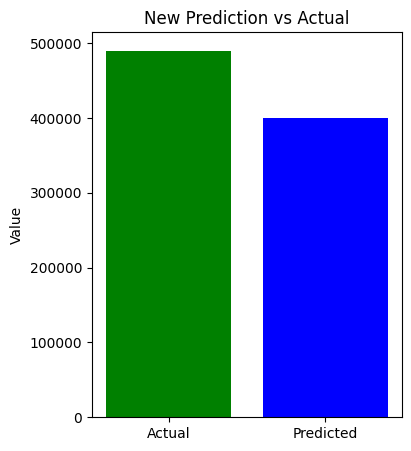

In [32]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Test Set)')
plt.show()


actual_value = 490000
plt.figure(figsize=(4, 5))
plt.bar(['Actual', 'Predicted'], [actual_value, prediction[0]], color=['green', 'blue'])
plt.title('New Prediction vs Actual')
plt.ylabel('Value')
plt.show()

## Modelo de Regresión Lineal

Se entrena un modelo de regresión lineal y se evalúa su desempeño utilizando las mismas métricas y visualizaciones que en el modelo anterior.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [34]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

## Visualización: Regresión Lineal - Real vs Predicción

Se grafica la relación entre los valores reales y los valores predichos por el modelo de regresión lineal, permitiendo comparar su desempeño con otros modelos.

In [36]:
r2 = r2_score(y_test, y_pred_linear)
mae = mean_absolute_error(y_test, y_pred_linear)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.4595
MAE: 114630.81
RMSE: 145485.87


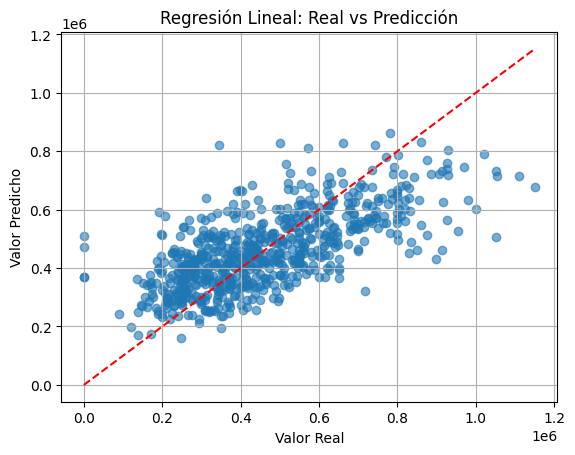

In [37]:
plt.scatter(y_test, y_pred_linear, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Regresión Lineal: Real vs Predicción')
plt.grid(True)
plt.show()

In [38]:
data_hause_modificada.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994


## Predicción con Nuevos Datos (Regresión Lineal)

Se realiza una predicción para una nueva vivienda utilizando el modelo de regresión lineal y se compara con el valor real.

In [39]:
nueva_casa = np.array([[3.0, 1.5, 1340, 7912, 1.5, 0, 0, 3, 1340, 0, 1955, 2005]])
# Use the correct variable name 'linear_model' instead of 'modelo_lineal'
precio_predicho = linear_model.predict(nueva_casa)
print(f"Precio estimado de la nueva casa: ${precio_predicho[0]:,.2f}")

Precio estimado de la nueva casa: $362,955.34


c:\Users\FA-BI\OneDrive\Documentos\Maestria IA\SEMESTRE 1\APRENDIZAJE ATOMATICO\Proyecto Final\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


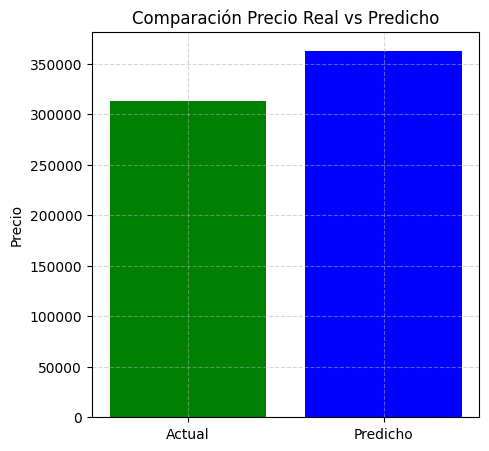

In [40]:
valor_real = 313000

plt.figure(figsize=(5, 5))
plt.bar(['Actual', 'Predicho'], [valor_real, precio_predicho[0]], color=['green', 'blue'])
plt.title('Comparación Precio Real vs Predicho')
plt.ylabel('Precio')
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

## Predicción con Nuevos Datos (Regresión Lineal)

Se realiza una predicción para una nueva vivienda utilizando el modelo de regresión lineal y se compara con el valor real.

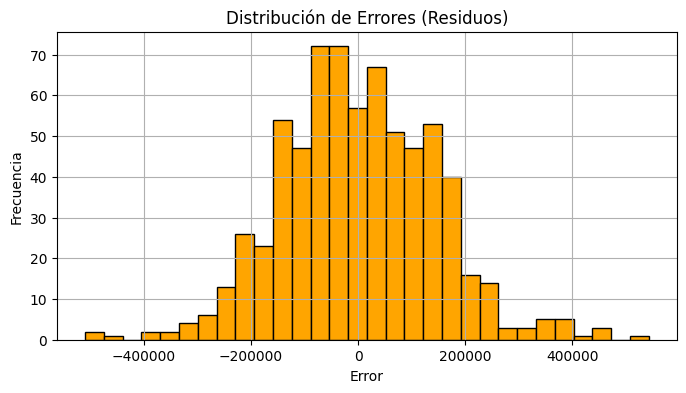

In [41]:
residuals = y_test - y_pred_linear

plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=30, color='orange', edgecolor='black')
plt.title('Distribución de Errores (Residuos)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

## Modelo Gradient Boosting Regressor

Se entrena un modelo de Gradient Boosting y se evalúa su desempeño, mostrando métricas y visualizaciones para comparar con los modelos anteriores.

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_model.fit(X_train, y_train)

y_pred_gbm = gbm_model.predict(X_test)

In [43]:
r2 = r2_score(y_test, y_pred_gbm)
mae = mean_absolute_error(y_test, y_pred_gbm)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbm))

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.4983
MAE: 109751.01
RMSE: 140170.42


## Visualización: Gradient Boosting - Real vs Predicción

La siguiente gráfica compara los valores reales de los precios de las viviendas (eje X) con los valores predichos por el modelo Gradient Boosting (eje Y). La línea roja punteada representa la referencia ideal donde las predicciones coinciden exactamente con los valores reales. Una mayor concentración de puntos cerca de esta línea indica un mejor desempeño del modelo.

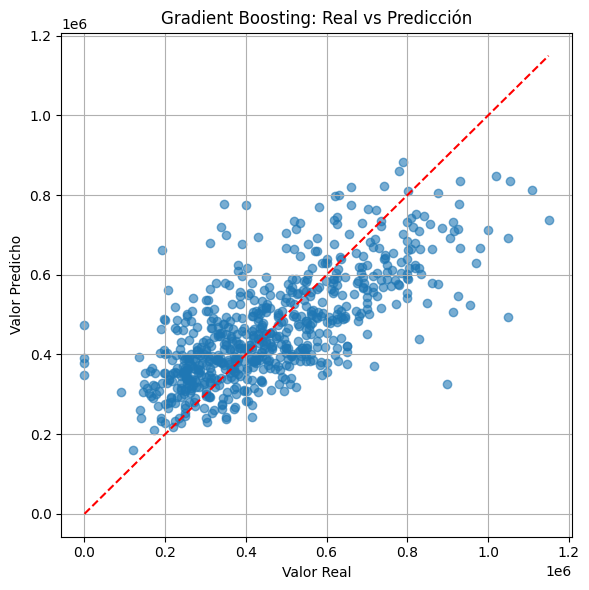

In [44]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_gbm, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Gradient Boosting: Real vs Predicción')
plt.grid(True)
plt.tight_layout()
plt.show()